### Đọc thông tin Header file WAV.

In [22]:
def read_wav_header(file_path):
    with open(file_path, 'rb') as file:
        header = file.read(44)         
        riff = header[0:4].decode('ascii')  
        file_size = int.from_bytes(header[4:8], 'little')  
        wave = header[8:12].decode('ascii')  
        fmt = header[12:16].decode('ascii')  
        fmt_chunk_size = int.from_bytes(header[16:20], 'little')  
        audio_format = int.from_bytes(header[20:22], 'little')  
        num_channels = int.from_bytes(header[22:24], 'little')  
        sample_rate = int.from_bytes(header[24:28], 'little')  
        byte_rate = int.from_bytes(header[28:32], 'little')  
        block_align = int.from_bytes(header[32:34], 'little')  
        bits_per_sample = int.from_bytes(header[34:36], 'little')  
        data = header[36:40].decode('ascii')  
        data_chunk_size = int.from_bytes(header[40:44], 'little')  

        return {
            "Chuẩn": riff,
            "Kích thước File": f"{file_size + 8} bytes",  # Tổng kích thước file (thêm 8 byte đầu tiên)
            "WAVE": wave,
            "fmt": fmt,
            "Kích thước fmt Chunk": f"{fmt_chunk_size} bytes",
            "Định dạng Audio": f"{audio_format} (1 = PCM, 3 = IEEE Float, etc.)",
            "Số kênh âm thanh": f"{num_channels} channels",
            "Tần số mẫu": f"{sample_rate} Hz",
            "Byte Rate": f"{byte_rate} bytes/second",
            "Block Align": f"{block_align} bytes",
            "Số bit trên mẫu": f"{bits_per_sample} bits",
            "Dữ liệu": data,
            "Kích thước Data Chunk": f"{data_chunk_size} bytes",
        }

file_path = "./WAV/102887__uknow-dude__drum-loop-solo-clap-2-119-bpm.wav"
header_info = read_wav_header(file_path)
for key, value in header_info.items():       
    print(f"{key}: {value}")


Chuẩn: RIFF
Kích thước File: 2846168 bytes
WAVE: WAVE
fmt: fmt 
Kích thước fmt Chunk: 16 bytes
Định dạng Audio: 1 (1 = PCM, 3 = IEEE Float, etc.)
Số kênh âm thanh: 2 channels
Tần số mẫu: 44100 Hz
Byte Rate: 176400 bytes/second
Block Align: 4 bytes
Số bit trên mẫu: 16 bits
Dữ liệu: data
Kích thước Data Chunk: 2846124 bytes


### Đồ Họa Dạng Sóng 

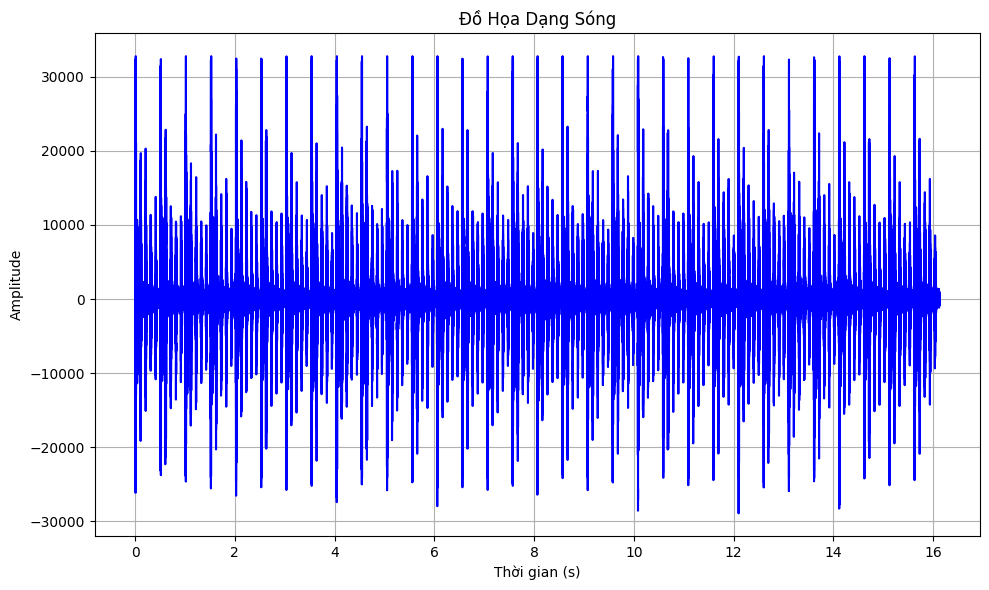

In [25]:
import wave
import numpy as np
import matplotlib.pyplot as plt

file_path = "./WAV/102887__uknow-dude__drum-loop-solo-clap-2-119-bpm.wav"

try:
    with wave.open(file_path, "rb") as wav_file:
        so_kenh = wav_file.getnchannels()
        tan_so_mau = wav_file.getframerate()
        tong_so_mau = wav_file.getnframes()
        
        thoi_luong = tong_so_mau / tan_so_mau
        raw_data = wav_file.readframes(tong_so_mau)
        audio_data = np.frombuffer(raw_data, dtype=np.int16)
        tmp1 = len(audio_data)
        
        if so_kenh == 2:
            audio_data = np.reshape(audio_data, (-1, 2))
            audio_data = audio_data[:, 0]

    time = np.linspace(0, thoi_luong, len(audio_data))
    tmp = len(audio_data)
    

    plt.figure(figsize=(10, 6))
    plt.plot(time, audio_data, color="blue")
    plt.title("Đồ Họa Dạng Sóng")
    plt.xlabel("Thời gian (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()

except wave.Error as e:
    print(f"Đây không phải là một file WAV chuẩn hoặc có lỗi trong việc đọc file. Lỗi: {e}")
    print(f"File không thể mở, mã lỗi: {e}")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")


### Đồ Họa Dạng Sóng 2 Kênh Riêng Biệt 

Tổng số mãu :355766 
Số lượng điểm khác biệt: 192972
Độ lệch tối đa: 6395


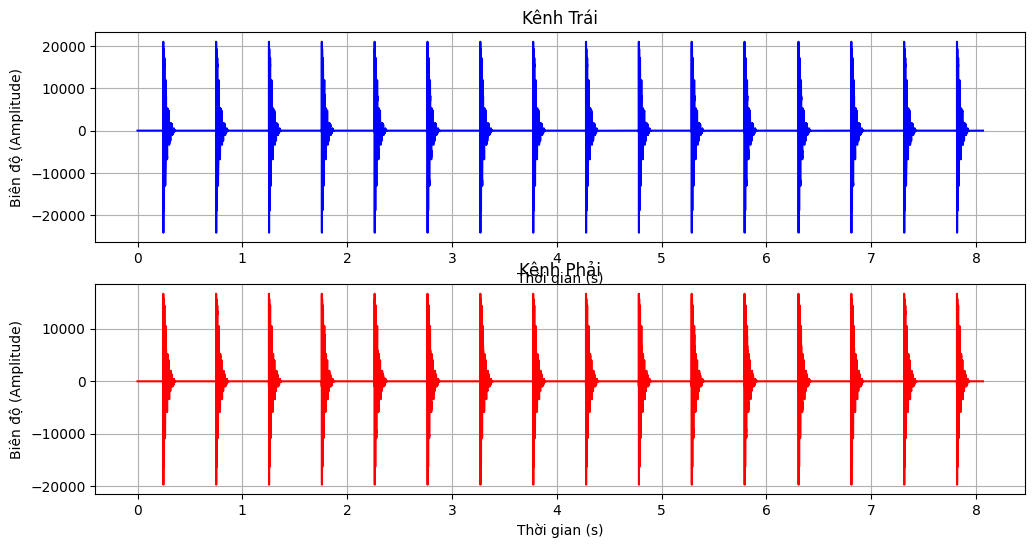

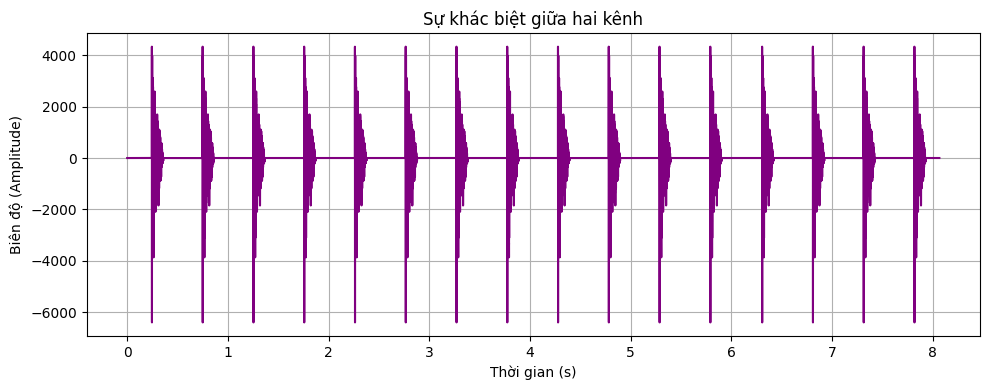

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

file_path = "./WAV/102888__uknow-dude__drum-loop-solo-kick-119-bpm.wav"

with wave.open(file_path, "rb") as wav_file:
    so_kenh = wav_file.getnchannels()
    tan_so_mau = wav_file.getframerate()
    tong_so_mau = wav_file.getnframes()
    thoi_luong = tong_so_mau / tan_so_mau
    raw_data = wav_file.readframes(tong_so_mau)
    audio_data = np.frombuffer(raw_data, dtype=np.int16)
    print(f"Tổng số mãu :{tong_so_mau} ")
    
    if so_kenh == 2:
        audio_data = np.reshape(audio_data, (-1, 2))  
        left_channel = audio_data[:, 0]  
        right_channel = audio_data[:, 1]  
        
    else:
        left_channel = audio_data  
        right_channel = None
    difference = left_channel - right_channel
    print("Số lượng điểm khác biệt:", np.count_nonzero(difference))
    print("Độ lệch tối đa:", np.max(np.abs(difference)))

time = np.linspace(0, thoi_luong, len(left_channel))

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, left_channel, color="blue")
plt.title("Kênh Trái")
plt.xlabel("Thời gian (s)")
plt.ylabel("Biên độ (Amplitude)")
plt.grid()

if right_channel is not None:
    plt.subplot(2, 1, 2)
    plt.plot(time, right_channel, color="red")
    plt.title("Kênh Phải")
    plt.xlabel("Thời gian (s)")
    plt.ylabel("Biên độ (Amplitude)")
    plt.grid()
    plt.figure(figsize=(10, 4))
    plt.plot(time, difference, color="purple")
    plt.title("Sự khác biệt giữa hai kênh")
    plt.xlabel("Thời gian (s)")
    plt.ylabel("Biên độ (Amplitude)")
    plt.grid()
   

plt.tight_layout()
plt.show()


### FFT Phân Tích Phổ(Spectrum)

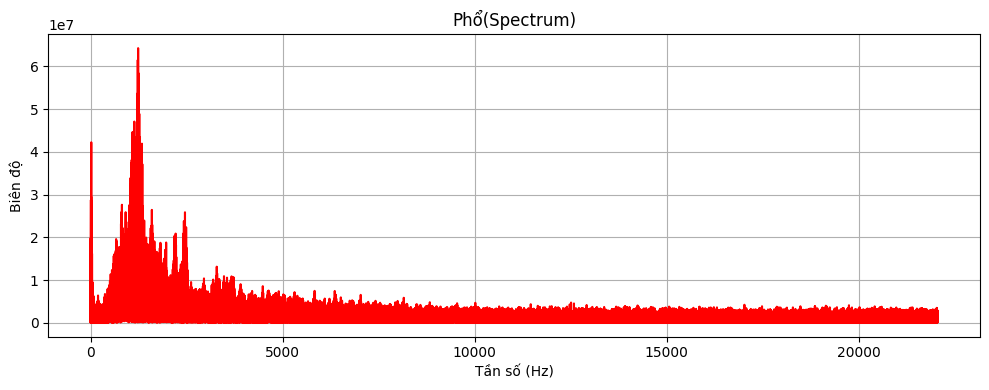

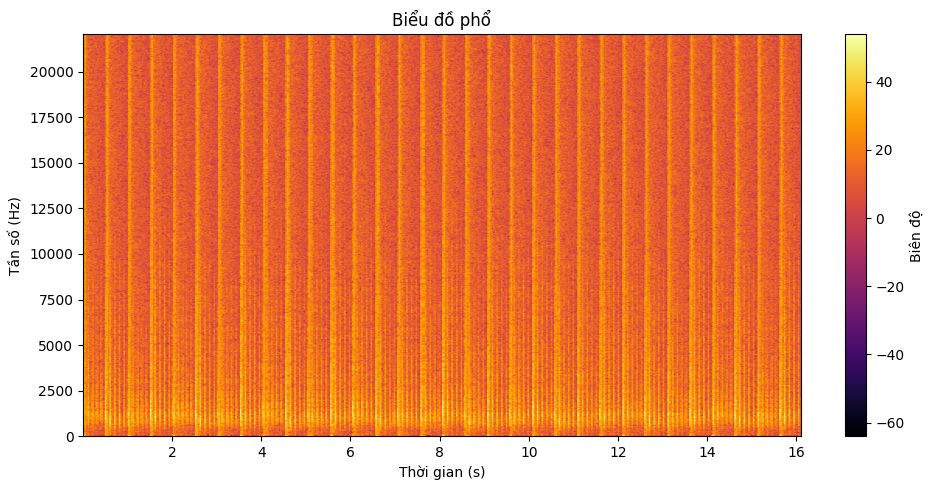

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    if N % 2 != 0:
        x = np.pad(x, (0, 1), mode='constant', constant_values=0)
        N += 1

    even = fft(x[0::2]) 
    odd = fft(x[1::2])   
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def fft_magnitude(x):
    return np.abs(fft(x))

def fftfreq_custom(N, d=1.0):
    freqs = np.zeros(N)
    for i in range(N):
        if i < N // 2:
            freqs[i] = i / (N * d)
        else:
            freqs[i] = (i - N) / (N * d)
    return freqs

file_path = "./WAV/102887__uknow-dude__drum-loop-solo-clap-2-119-bpm.wav"

with wave.open(file_path, "rb") as wav_file:
    n_channels = wav_file.getnchannels() 
    sample_width = wav_file.getsampwidth()  
    sample_rate = wav_file.getframerate()  
    n_frames = wav_file.getnframes()  
    duration = n_frames / sample_rate  
    raw_data = wav_file.readframes(n_frames)
    audio_data = np.frombuffer(raw_data, dtype=np.int16)

    if n_channels == 2:
        audio_data = np.reshape(audio_data, (-1, 2))
        audio_data = audio_data[:, 0]  
magnitude = fft_magnitude(audio_data)
frequencies = fftfreq_custom(len(audio_data), 1/sample_rate)
min_len = min(len(frequencies), len(magnitude))
frequencies = frequencies[:min_len]
magnitude = magnitude[:min_len]


plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2], color="red")
plt.title("Phổ(Spectrum)")
plt.xlabel("Tần số (Hz)")
plt.ylabel("Biên độ")
plt.grid()
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
plt.specgram(audio_data, Fs=sample_rate, NFFT=1024, noverlap=512, cmap='inferno')
plt.title("Biểu đồ phổ")
plt.xlabel("Thời gian (s)")
plt.ylabel("Tần số (Hz)")
plt.colorbar(label="Biên độ")
plt.tight_layout()
plt.show()
